In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-53.96011242275473 42.83204065891567
-76.09530371154753 75.05833472730947
-39.17670571552711 -19.393782504375338
-33.758499808767425 116.9908727467365
-35.69928204355649 -11.744766005071881
11.129718125895423 -168.13281644928128
31.162596165911566 -170.3693983322421
0.9019070321852496 60.304285886632755
84.60962972994523 -2.7077141085889593
-16.45397439021488 145.04348981349443
23.276716412813087 -37.52974971692811
-84.64587292915579 -33.37230535429174
-85.21789261928099 -28.06866877898932
-47.471473283007604 149.94360458104904
-50.53551925529541 -48.312201937250904
-56.086758190783684 -102.66242329458476
-43.86502383354212 119.05306189605079
3.9265217421580587 50.786521312149915
-15.91648654880808 162.4355092977866
19.929745232733552 21.55723363989324
-67.00021886827895 -176.98508850363237
70.95115741191796 104.41801475352969
46.1735241823645 -161.4436087053885
-45.654779925333344 100.33788668559941
52.23934615629932 33.98308224749056
-69.30249994829185 -125.20647606196155
9.833627787

-3.054606970946381 68.87903015707752
27.32149757228646 -22.67248143993325
61.20705539666133 111.2842611131507
-43.38673944622813 45.75335953944597
81.94368838751996 -70.51111464774975
35.493170902302595 -148.78708898958357
1.2980118204615394 -139.2129975327882
45.91450410878082 99.10514224616139
0.9453175525827078 2.359437813235445
23.561554407697102 75.60798122249389
22.854320434856533 17.208724215403265
12.371163247399608 -170.28345430773717
35.35187306194345 -120.49944277692397
-27.160768047128308 56.87240176396233
-22.845393679058674 144.42956200975357
63.462727630993214 -147.7149526590064
-43.939389282561606 42.6130723077888
1.8388757549521841 -113.89804565434244
65.23974316801844 66.33610394645316
-80.72469184935045 -35.50930535139486
-63.45665374368463 -53.5146921806752
83.44214650552365 -66.20690183585143
-15.632130108737996 159.7880773303615
-32.89436942091037 173.4913924706014
38.15630162516106 2.7009960130240813
-38.693092978039495 56.064546338344144
81.09347490540895 107.01

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
import requests
requests.__version__

'2.27.1'

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | east london
Processing Record 2 of Set 13 | saint-philippe
Processing Record 3 of Set 13 | jamestown
Processing Record 4 of Set 13 | collie
Processing Record 5 of Set 13 | kapaa
Processing Record 6 of Set 13 | victoria
Processing Record 7 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 13 | mareeba
Processing Record 9 of Set 13 | ponta do sol
Processing Record 10 of Set 13 | ushuaia
Processing Record 11 of Set 13 | hobart
Processing Record 12 of Set 13 | mar del plata
Processing Record 13 of Set 13 | punta arenas
Processing Record 14 of Set 13 | albany
Processing Record 15 of Set 13 | hobyo
Processing Record 16 of Set 13 | poum
Processing Record 17 of Set 13 | faya
Processing Record 18 of Set 13 | vaini
Processing Record 19 of Set 13 | khatanga
Processing Record 20 of Set 13 | bethel
Processing Record 21 of Set 13 | busselton
Processing Record 22 of Set 13 | druzhba
Processing Record 23 of Set 13 | rikitea
Processing Record

Processing Record 35 of Set 16 | troitsko-pechorsk
Processing Record 36 of Set 16 | nanortalik
Processing Record 37 of Set 16 | hithadhoo
Processing Record 38 of Set 16 | kuhestan
City not found. Skipping...
Processing Record 39 of Set 16 | kruisfontein
Processing Record 40 of Set 16 | astoria
Processing Record 41 of Set 16 | takoradi
Processing Record 42 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 16 | lata
Processing Record 44 of Set 16 | lincoln
Processing Record 45 of Set 16 | trincomalee
Processing Record 46 of Set 16 | uray
Processing Record 47 of Set 16 | beian
Processing Record 48 of Set 16 | kununurra
Processing Record 49 of Set 16 | cayenne
Processing Record 50 of Set 16 | teya
Processing Record 1 of Set 17 | villa alemana
Processing Record 2 of Set 17 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 17 | nemuro
Processing Record 4 of Set 17 | goksun
Processing Record 5 of Set 17 | coahuayana
Processing Record 6 of Se

Processing Record 21 of Set 20 | cotonou
Processing Record 22 of Set 20 | adrar
Processing Record 23 of Set 20 | malartic
Processing Record 24 of Set 20 | shaunavon
Processing Record 25 of Set 20 | lebu
Processing Record 26 of Set 20 | araouane
Processing Record 27 of Set 20 | riyadh
Processing Record 28 of Set 20 | diffa
Processing Record 29 of Set 20 | zhuanghe
Processing Record 30 of Set 20 | harper
Processing Record 31 of Set 20 | havre
Processing Record 32 of Set 20 | san patricio
Processing Record 33 of Set 20 | koyelga
Processing Record 34 of Set 20 | buala
Processing Record 35 of Set 20 | hambantota
Processing Record 36 of Set 20 | ambilobe
Processing Record 37 of Set 20 | almonte
Processing Record 38 of Set 20 | pampa
Processing Record 39 of Set 20 | urumqi
Processing Record 40 of Set 20 | corinto
Processing Record 41 of Set 20 | santa marta
Processing Record 42 of Set 20 | padang
Processing Record 43 of Set 20 | simao
Processing Record 44 of Set 20 | makakilo city
Processing 

Processing Record 12 of Set 24 | taga
Processing Record 13 of Set 24 | dukat
Processing Record 14 of Set 24 | goure
Processing Record 15 of Set 24 | shu
Processing Record 16 of Set 24 | panaba
Processing Record 17 of Set 24 | pyinmana
Processing Record 18 of Set 24 | camacha
Processing Record 19 of Set 24 | yaguajay
Processing Record 20 of Set 24 | airai
Processing Record 21 of Set 24 | praia
Processing Record 22 of Set 24 | inuvik
Processing Record 23 of Set 24 | shimoda
Processing Record 24 of Set 24 | san quintin
Processing Record 25 of Set 24 | lapua
Processing Record 26 of Set 24 | navahrudak
Processing Record 27 of Set 24 | sorland
Processing Record 28 of Set 24 | sciacca
Processing Record 29 of Set 24 | conceicao do araguaia
Processing Record 30 of Set 24 | chastoozerye
City not found. Skipping...
Processing Record 31 of Set 24 | berezovyy
Processing Record 32 of Set 24 | port hawkesbury
Processing Record 33 of Set 24 | denizli
Processing Record 34 of Set 24 | kimberley
Processi

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,59.79,68,6,5.57,ZA,2022-07-08 01:10:58
1,Saint-Philippe,-21.3585,55.7679,64.22,82,11,11.61,RE,2022-07-08 01:10:58
2,Jamestown,42.0970,-79.2353,67.64,67,0,5.75,US,2022-07-08 01:10:51
3,Collie,-33.3667,116.1500,55.65,77,27,4.14,AU,2022-07-08 01:10:58
4,Kapaa,22.0752,-159.3190,84.52,70,75,19.57,US,2022-07-08 01:10:59
5,Victoria,22.2855,114.1577,89.96,81,43,10.00,HK,2022-07-08 01:06:57
6,Mareeba,-17.0000,145.4333,74.66,62,0,2.75,AU,2022-07-08 01:10:59
7,Ponta Do Sol,32.6667,-17.1000,69.01,81,4,4.25,PT,2022-07-08 01:11:00
8,Ushuaia,-54.8000,-68.3000,29.86,74,20,6.91,AR,2022-07-08 01:09:29
9,Hobart,-42.8794,147.3294,51.26,81,75,17.27,AU,2022-07-08 01:11:00


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-07-08 01:10:58,-33.0153,27.9116,59.79,68,6,5.57
1,Saint-Philippe,RE,2022-07-08 01:10:58,-21.3585,55.7679,64.22,82,11,11.61
2,Jamestown,US,2022-07-08 01:10:51,42.0970,-79.2353,67.64,67,0,5.75
3,Collie,AU,2022-07-08 01:10:58,-33.3667,116.1500,55.65,77,27,4.14
4,Kapaa,US,2022-07-08 01:10:59,22.0752,-159.3190,84.52,70,75,19.57
...,...,...,...,...,...,...,...,...,...
568,Petropavlovsk-Kamchatskiy,RU,2022-07-08 01:26:25,53.0452,158.6483,70.39,60,0,11.18
569,Svetlaya,RU,2022-07-08 01:26:25,46.5389,138.3297,68.67,83,100,13.65
570,Terrace,CA,2022-07-08 01:22:49,54.5163,-128.6035,60.71,88,100,10.36
571,Grand Gaube,MU,2022-07-08 01:26:26,-20.0064,57.6608,70.20,83,42,3.00


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657243587.1602318

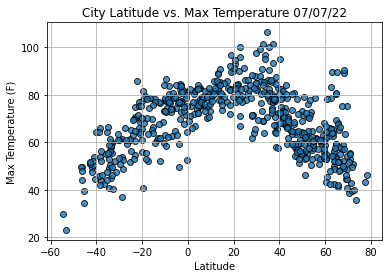

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

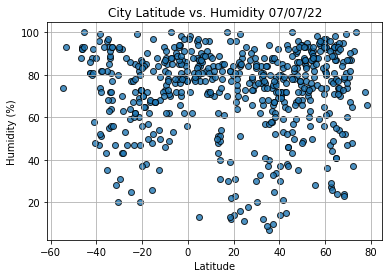

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

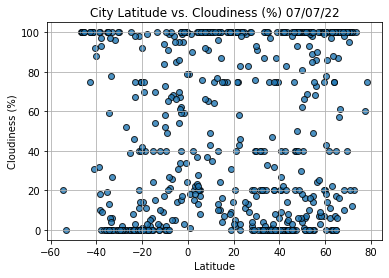

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

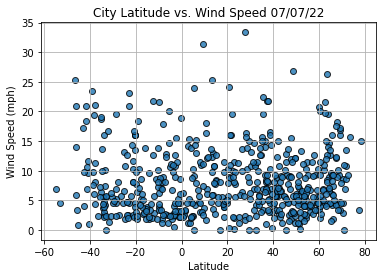

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [26]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [27]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [28]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

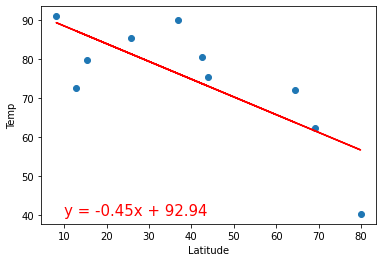

In [29]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [32]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                        Hobyo
Country                        SO
Date          2022-07-08 01:11:01
Lat                        5.3505
Lng                       48.5268
Max Temp                    75.16
Humidity                       77
Cloudiness                     17
Wind Speed                  23.96
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
568     True
569     True
570     True
571    False
572    False
Name: Lat, Length: 573, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jamestown,US,2022-07-08 01:10:51,42.0970,-79.2353,67.64,67,0,5.75
4,Kapaa,US,2022-07-08 01:10:59,22.0752,-159.3190,84.52,70,75,19.57
5,Victoria,HK,2022-07-08 01:06:57,22.2855,114.1577,89.96,81,43,10.00
7,Ponta Do Sol,PT,2022-07-08 01:11:00,32.6667,-17.1000,69.01,81,4,4.25
12,Albany,US,2022-07-08 01:06:47,42.6001,-73.9662,74.39,72,100,2.64
...,...,...,...,...,...,...,...,...,...
566,Minot,US,2022-07-08 01:24:25,48.2325,-101.2963,71.82,68,100,11.50
567,Pacifica,US,2022-07-08 01:23:58,37.6138,-122.4869,78.15,77,20,21.85
568,Petropavlovsk-Kamchatskiy,RU,2022-07-08 01:26:25,53.0452,158.6483,70.39,60,0,11.18
569,Svetlaya,RU,2022-07-08 01:26:25,46.5389,138.3297,68.67,83,100,13.65


In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jamestown,US,2022-07-08 01:10:51,42.0970,-79.2353,67.64,67,0,5.75
4,Kapaa,US,2022-07-08 01:10:59,22.0752,-159.3190,84.52,70,75,19.57
5,Victoria,HK,2022-07-08 01:06:57,22.2855,114.1577,89.96,81,43,10.00
7,Ponta Do Sol,PT,2022-07-08 01:11:00,32.6667,-17.1000,69.01,81,4,4.25
12,Albany,US,2022-07-08 01:06:47,42.6001,-73.9662,74.39,72,100,2.64


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

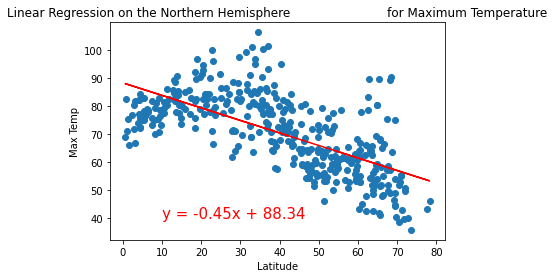

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

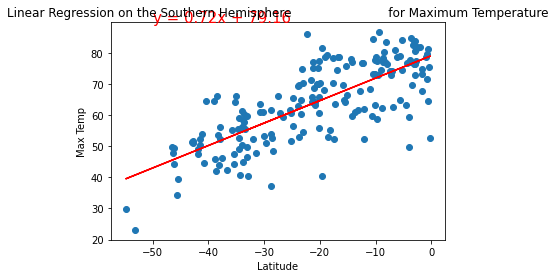

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

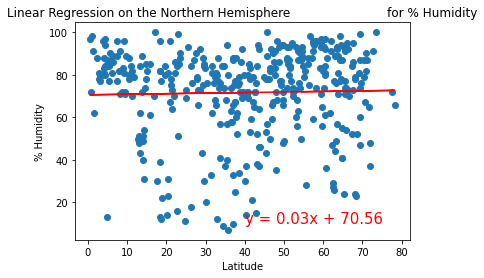

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

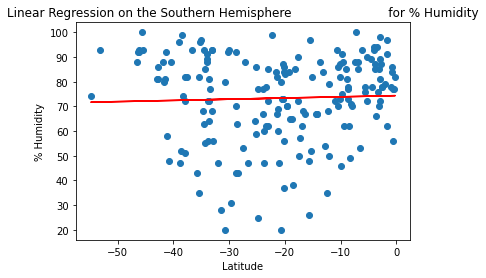

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

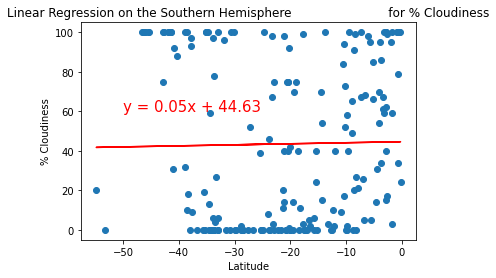

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

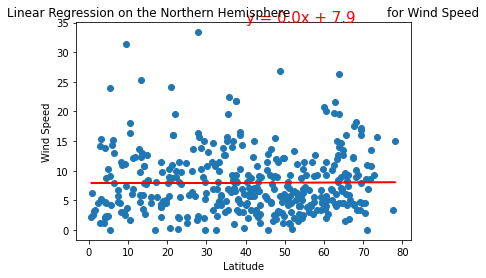

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

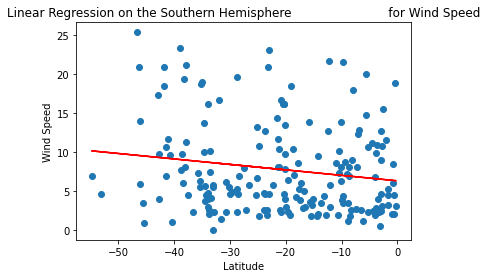

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [47]:
conda install -c conda-forge gmaps

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\zd590e\Anaconda3\envs\PythonData

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py37h03978a9_1        1001 KB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojson-2.5.0-py_0
  gmaps              conda-forge/noarch::gmaps-0.9.0-py_0
  python_abi  

In [48]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
